In [ ]:
!pip install xlrd==1.2.0

In [1]:
import itertools
import time

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

import pandas as pd
import numpy as np

## Data

In [319]:
df = pd.read_excel('data_all.xlsx',engine='openpyxl')
pd.set_option('display.float_format', lambda x: '%.4f' % x) #decimal
df = df.transpose()
df

,0,1,2,3,4,5,6
Indicators,Population,Purchasing power parities,Household size,Median equivalised net income,Cost of residential electricity,Cost of residential natural gas,Consumption estimates
2009,59000.5860,1648943.0000,2.4700,15605.0000,0.1365,0.0430,34040.6360
2010,59190.1430,1690822.0000,2.4600,15964.0000,0.1387,0.0437,35392.9110
2011,59364.6900,1740687.0000,2.4400,15971.0000,0.1404,0.0502,32378.0630
2012,59394.2070,1748690.0000,2.4200,15979.0000,0.1485,0.0578,34348.3360
2013,59685.2270,1711006.0000,2.4200,15733.0000,0.1499,0.0592,34230.6200
2014,60782.6680,1730018.0000,2.4100,15759.0000,0.1504,0.0579,29545.9800
2015,60795.6120,1799252.0000,2.3900,15846.0000,0.1493,0.0544,32494.4830
2016,60665.5510,1845177.0000,2.3700,16247.0000,0.1359,0.0502,32185.1010
2017,60589.4450,1874627.0000,2.3600,16542.0000,0.1324,0.0504,32898.6390


In [320]:
df1 = df.iloc[1:12, :]
df1.columns = ['population','PPP','household_size','median_income','electricity_cost','gas_cost','consumption']
#df1['time']=list(df1.index)
df1

,population,PPP,household_size,median_income,electricity_cost,gas_cost,consumption
2009,59000.5860,1648943.0000,2.4700,15605.0000,0.1365,0.0430,34040.6360
2010,59190.1430,1690822.0000,2.4600,15964.0000,0.1387,0.0437,35392.9110
2011,59364.6900,1740687.0000,2.4400,15971.0000,0.1404,0.0502,32378.0630
2012,59394.2070,1748690.0000,2.4200,15979.0000,0.1485,0.0578,34348.3360
2013,59685.2270,1711006.0000,2.4200,15733.0000,0.1499,0.0592,34230.6200
2014,60782.6680,1730018.0000,2.4100,15759.0000,0.1504,0.0579,29545.9800
2015,60795.6120,1799252.0000,2.3900,15846.0000,0.1493,0.0544,32494.4830
2016,60665.5510,1845177.0000,2.3700,16247.0000,0.1359,0.0502,32185.1010
2017,60589.4450,1874627.0000,2.3600,16542.0000,0.1324,0.0504,32898.6390
2018,60483.9730,1914666.0000,2.3400,16844.0000,0.1351,0.0540,32055.8760


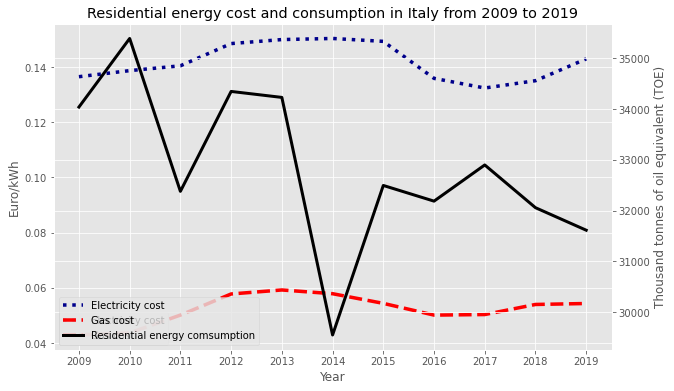

In [321]:
#https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
#from matplotlib.dates import DateFormatter, DayLocator
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Euro/kWh')
ax.set_title('Residential energy cost and consumption in Italy from 2009 to 2019')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df1.index, df1.electricity_cost, color='darkblue',linestyle='dotted', label='Electricity cost',linewidth=3.5)
ax.plot(df1.index, df1.gas_cost, color='red', linestyle='--', label='Gas cost',linewidth=3.5)
ax.legend(loc='lower left');

# Plotting on the second y-axis
axb.set_ylabel('Thousand tonnes of oil equivalent (TOE)')
axb.plot(df1.index, df1.consumption, color='black', label='Residential energy comsumption',linewidth=3)

# Merging legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='lower left');

plt.savefig('1_cost_comsumption.png')

In [322]:
df1.head(2)

,population,PPP,household_size,median_income,electricity_cost,gas_cost,consumption
2009,59000.5860,1648943.0000,2.4700,15605.0000,0.1365,0.0430,34040.6360
2010,59190.1430,1690822.0000,2.4600,15964.0000,0.1387,0.0437,35392.9110


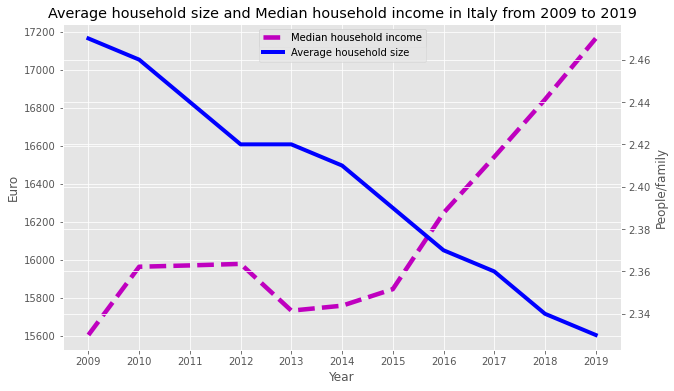

In [339]:
#https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
#from matplotlib.dates import DateFormatter, DayLocator
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Euro')
ax.set_title('Average household size and Median household income in Italy from 2009 to 2019')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df1.index, df1.median_income, color='m', linestyle='--',label='Median household income',linewidth=4.5)
ax.legend(loc='upper center');

# Plotting on the second y-axis
axb.set_ylabel('People/family')
axb.plot(df1.index, df1.household_size, color='blue',label='Average household size',linewidth=4)

# Merging legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper center');

plt.savefig('1_household.png')

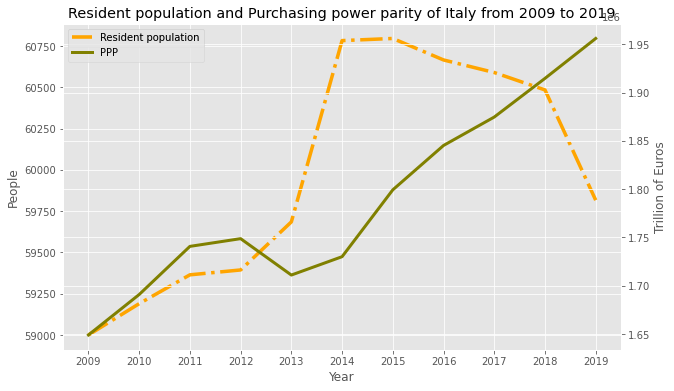

In [340]:
#https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
#from matplotlib.dates import DateFormatter, DayLocator
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('People')
ax.set_title('Resident population and Purchasing power parity of Italy from 2009 to 2019')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df1.index, df1.population, color='orange', linestyle='-.',label='Resident population',linewidth=3.5)
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Trillion of Euros')
axb.plot(df1.index, df1.PPP, color='olive',label='PPP',linewidth=3)

# Merging legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

plt.savefig('1_population_ppp.png')

https://xavierbourretsicotte.github.io/subset_selection.html

In [325]:
### Helper function for fitting linear regression (Sklearn)
def fit_lin_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [326]:
#Implementing Best subset selection (using itertools.combinations)
#tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook 
#Initialization variables
Y = df1.consumption
X = df1.drop(columns = 'consumption', axis = 1)
k = 6
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 6 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 6 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_lin_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
dfqa = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if sys.path[0] == '':


Loop...:   0%|          | 0/6 [00:00<?, ?it/s]

## Finding the best subsets for each number of features
Using the smallest RSS value, or the largest R_squared value

In [327]:
df_min = dfqa[dfqa.groupby('numb_features')['RSS'].transform(min) == dfqa['RSS']]
df_max = dfqa[dfqa.groupby('numb_features')['R_squared'].transform(max) == dfqa['R_squared']]

In [328]:
dfqa['min_RSS'] = dfqa.groupby('numb_features')['RSS'].transform(min)
dfqa['max_R_squared'] = dfqa.groupby('numb_features')['R_squared'].transform(max)
pd.set_option('display.max_rows',None)

dftr = dfqa.drop(['min_RSS','max_R_squared'],1)
dfqa

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,13500600.6952,0.4789,"(population,)",13500600.6952,0.4789
1,1,20702970.4468,0.2008,"(PPP,)",13500600.6952,0.4789
2,1,18749956.0303,0.2762,"(household_size,)",13500600.6952,0.4789
3,1,23737247.8917,0.0837,"(median_income,)",13500600.6952,0.4789
4,1,25353261.2748,0.0213,"(electricity_cost,)",13500600.6952,0.4789
5,1,21535506.2730,0.1687,"(gas_cost,)",13500600.6952,0.4789
6,2,13342988.1119,0.4849,"(population, PPP)",13072380.9508,0.4954
7,2,13355503.7710,0.4845,"(population, household_size)",13072380.9508,0.4954
8,2,13213995.5448,0.4899,"(population, median_income)",13072380.9508,0.4954
9,2,13127442.7892,0.4933,"(population, electricity_cost)",13072380.9508,0.4954


In [329]:
with open('subset_selection.tex','w') as tf:
    tf.write(dftr.to_latex())

#### Plotting the best subset selection process¶

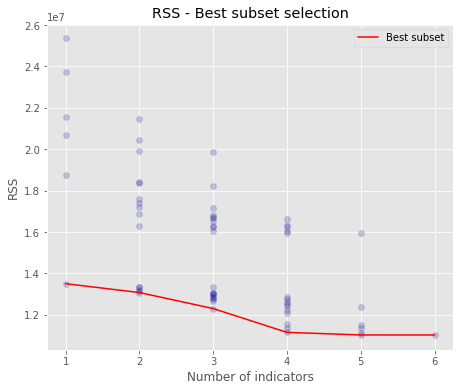

In [330]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(dfqa.numb_features,dfqa.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('Number of indicators')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(dfqa.numb_features,dfqa.min_RSS,color = 'r', label = 'Best subset')
ax.legend()
plt.savefig('3_RSS.png')
plt.show()


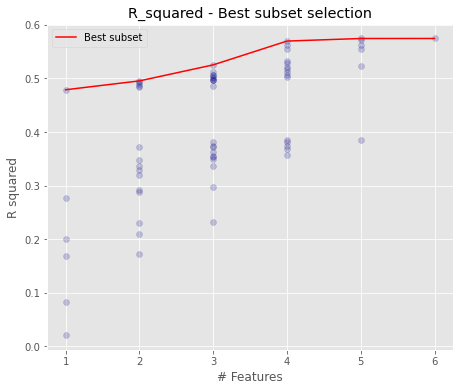

In [331]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(dfqa.numb_features,dfqa.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(dfqa.numb_features,dfqa.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()
plt.savefig('3_R2.png')
plt.show()



**We choose a model with 4 indicators. Let check which 4 indicators should we pick up.**

In [72]:
pd.set_option('display.max_colwidth', -1)  # -1 or None?
dfqa.loc[dfqa['numb_features']==4]

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
41,4,12871596.4392,0.5031,"(population, PPP, household_size, median_income)",11147241.8625,0.5697
42,4,12400796.8949,0.5213,"(population, PPP, household_size, electricity_cost)",11147241.8625,0.5697
43,4,12511084.5469,0.5171,"(population, PPP, household_size, gas_cost)",11147241.8625,0.5697
44,4,11537080.0284,0.5547,"(population, PPP, median_income, electricity_cost)",11147241.8625,0.5697
45,4,12091076.4135,0.5333,"(population, PPP, median_income, gas_cost)",11147241.8625,0.5697
46,4,12630587.6494,0.5124,"(population, PPP, electricity_cost, gas_cost)",11147241.8625,0.5697
47,4,11147241.8625,0.5697,"(population, household_size, median_income, electricity_cost)",11147241.8625,0.5697
48,4,11349843.2315,0.5619,"(population, household_size, median_income, gas_cost)",11147241.8625,0.5697
49,4,12776707.2110,0.5068,"(population, household_size, electricity_cost, gas_cost)",11147241.8625,0.5697
50,4,12220016.6072,0.5283,"(population, median_income, electricity_cost, gas_cost)",11147241.8625,0.5697


### Computing the C_p, AIC, BIC and R-square adjusted

In [332]:
dfqq = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
dfqq['numb_features'] = dfqq.index
dfqq

NameError: name 'features_list' is not defined

In [78]:
dfqa.head(2)

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,13500600.6952,0.4789,"(population,)",13500600.6952,0.4789
1,1,20702970.4468,0.2008,"(PPP,)",13500600.6952,0.4789


In [333]:
#Initializing useful variables
m = len(Y)
p = 6
hat_sigma_squared = (1/(m - p -1)) * min(dfqa['RSS'])

#Computing
dfqa['C_p'] = (1/m) * (dfqa['RSS'] + 2 * dfqa['numb_features'] * hat_sigma_squared )
dfqa['AIC'] = (1/(m*hat_sigma_squared)) * (dfqa['RSS'] + 2 * dfqa['numb_features'] * hat_sigma_squared )
dfqa['BIC'] = (1/(m*hat_sigma_squared)) * (dfqa['RSS'] +  np.log(m) * dfqa['numb_features'] * hat_sigma_squared )
dfqa['R_squared_adj'] = 1 - ( (1 - dfqa['R_squared'])*(m-1)/(m-dfqa['numb_features'] -1))
dfqa

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared,C_p,AIC,BIC,R_squared_adj
0,1,13500600.6952,0.4789,"(population,)",13500600.6952,0.4789,1728307.9773,0.6272,0.6634,0.4210
1,1,20702970.4468,0.2008,"(PPP,)",13500600.6952,0.4789,2383068.8638,0.8649,0.9010,0.1120
2,1,18749956.0303,0.2762,"(household_size,)",13500600.6952,0.4789,2205522.0986,0.8004,0.8366,0.1958
3,1,23737247.8917,0.0837,"(median_income,)",13500600.6952,0.4789,2658912.2679,0.9650,1.0012,-0.0181
4,1,25353261.2748,0.0213,"(electricity_cost,)",13500600.6952,0.4789,2805822.5754,1.0183,1.0545,-0.0874
5,1,21535506.2730,0.1687,"(gas_cost,)",13500600.6952,0.4789,2458753.9389,0.8923,0.9285,0.0763
6,2,13342988.1119,0.4849,"(population, PPP)",13072380.9508,0.4954,2214960.2019,0.8039,0.8762,0.3562
7,2,13355503.7710,0.4845,"(population, household_size)",13072380.9508,0.4954,2216097.9891,0.8043,0.8766,0.3556
8,2,13213995.5448,0.4899,"(population, median_income)",13072380.9508,0.4954,2203233.6049,0.7996,0.8720,0.3624
9,2,13127442.7892,0.4933,"(population, electricity_cost)",13072380.9508,0.4954,2195365.1726,0.7968,0.8691,0.3666


In [334]:
dfcp = dfqa.drop(['RSS','R_squared','min_RSS','max_R_squared','R_squared_adj'],1)
dfcp

,numb_features,features,C_p,AIC,BIC
0,1,"(population,)",1728307.9773,0.6272,0.6634
1,1,"(PPP,)",2383068.8638,0.8649,0.9010
2,1,"(household_size,)",2205522.0986,0.8004,0.8366
3,1,"(median_income,)",2658912.2679,0.9650,1.0012
4,1,"(electricity_cost,)",2805822.5754,1.0183,1.0545
5,1,"(gas_cost,)",2458753.9389,0.8923,0.9285
6,2,"(population, PPP)",2214960.2019,0.8039,0.8762
7,2,"(population, household_size)",2216097.9891,0.8043,0.8766
8,2,"(population, median_income)",2203233.6049,0.7996,0.8720
9,2,"(population, electricity_cost)",2195365.1726,0.7968,0.8691


In [338]:
with open('cp_selection.tex','w') as tf:
    tf.write(dfcp.to_latex())

### Run regression model
population, household_size, median_income, electricity_cost, gas_cost

https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm

In [85]:
import statsmodels.api as sm

In [86]:
df1.head(1)

,population,PPP,household_size,median_income,electricity_cost,gas_cost,consumption
2009,59000.5860,1648943.0000,2.4700,15605.0000,0.1365,0.0430,34040.6360


In [346]:
#(population, household_size, median_income, electricity_cost)
X = df1[['population','median_income']]
y = df1['consumption']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X)
ols = model.summary()
ols

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     3.842
Date:                Thu, 25 Mar 2021   Prob (F-statistic):             0.0677
Time:                        13:31:29   Log-Likelihood:                -92.602
No. Observations:                  11   AIC:                             191.2
Df Residuals:                       8   BIC:                             192.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.306e+05   3.53e+04      3.699      0.006    4.92e+04    2.12e+05
population       -1.5349      0.608     -2.524      0.036      -2.937      -0.133
median_income    -0.3528      0.847     -0.417      0.688      -2.306       1.600
==============================================================================
Omnibus:                        1.713   Durbin-Watson:                   2.725
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.232
Skew:                          -0.711   Prob(JB):                        0.540
Kurtosis:                       2.184   Cond. No.                     5.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
with open('OLS.tex','w') as tf:
    tf.write(ols.as_latex())

In [106]:
'''Interpreting the Output — 
We can see here that this model has a much higher R-squared value — 0.999, meaning that this model explains 99.9% of the variance in our dependent variable.
Whenever we add variables to a regression model, R² will be higher, but this is a pretty high R².
We can see that both Household_size statistically significant in predicting (or estimating) the consumer demand;
We see that as RM increases by 1, MEDV will increase by 4.9069 and when LSTAT increases by 1, MEDV will decrease by -0.6557. As you may remember, LSTAT is the percentage of lower status of the population, and unfortunately we can expect that it will lower the median value of houses. With this same logic, the more rooms in a house, usually the higher its value will be.
This was the example of both single and multiple linear regression in Statsmodels. We could have used as little or as many variables we wanted in our regression model(s) — up to all the 13! Next, I will demonstrate how to run linear regression models in SKLearn.'''

'Interpreting the Output — \nWe can see here that this model has a much higher R-squared value — 0.999, meaning that this model explains 99.9% of the variance in our dependent variable.\nWhenever we add variables to a regression model, R² will be higher, but this is a pretty high R².\nWe can see that both Household_size statistically significant in predicting (or estimating) the consumer demand;\nWe see that as RM increases by 1, MEDV will increase by 4.9069 and when LSTAT increases by 1, MEDV will decrease by -0.6557. As you may remember, LSTAT is the percentage of lower status of the population, and unfortunately we can expect that it will lower the median value of houses. With this same logic, the more rooms in a house, usually the higher its value will be.\nThis was the example of both single and multiple linear regression in Statsmodels. We could have used as little or as many variables we wanted in our regression model(s) — up to all the 13! Next, I will demonstrate how to run li

In [211]:
df1

,population,PPP,household_size,median_income,electricity_cost,gas_cost,consumption,time
2009,59000.5860,1648943.0000,2.4700,15605.0000,0.1365,0.0430,34040.6360,2009
2010,59190.1430,1690822.0000,2.4600,15964.0000,0.1387,0.0437,35392.9110,2010
2011,59364.6900,1740687.0000,2.4400,15971.0000,0.1404,0.0502,32378.0630,2011
2012,59394.2070,1748690.0000,2.4200,15979.0000,0.1485,0.0578,34348.3360,2012
2013,59685.2270,1711006.0000,2.4200,15733.0000,0.1499,0.0592,34230.6200,2013
2014,60782.6680,1730018.0000,2.4100,15759.0000,0.1504,0.0579,29545.9800,2014
2015,60795.6120,1799252.0000,2.3900,15846.0000,0.1493,0.0544,32494.4830,2015
2016,60665.5510,1845177.0000,2.3700,16247.0000,0.1359,0.0502,32185.1010,2016
2017,60589.4450,1874627.0000,2.3600,16542.0000,0.1324,0.0504,32898.6390,2017
2018,60483.9730,1914666.0000,2.3400,16844.0000,0.1351,0.0540,32055.8760,2018


In [214]:
x=df1.index
plt(x, y=df1['consumption'])

TypeError: 'module' object is not callable

In [238]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
# fit model
df1['consumption'] = pd.to_numeric(df1['consumption'])
model = SARIMAX(df11['consumption'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df11), len(df11))
print(yhat)
''''''
type(yhat)

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2021-01-01   31349.9163
Freq: AS-JAN, dtype: float64


/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


pandas.core.series.Series

In [ ]:
#https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
#from matplotlib.dates import DateFormatter, DayLocator
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('n')
ax.set_ylabel('b')
ax.set_title('title')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df11.index, df11.consumption, color='darkblue',linestyle='dotted', label='Electricity cost',linewidth=3.5)
ax.legend(loc='lower left');

# Plotting on the second y-axis
axb.set_ylabel('Thousand tonnes of oil equivalent (TOE)')
axb.plot(df1.index, df1.consumption, color='black', label='Residential energy comsumption',linewidth=3)

# Merging legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='lower left');

In [237]:
type(df1['consumption'])

pandas.core.series.Series

In [228]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
mod = sm.tsa.statespace.SARIMAX(df11['consumption'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/Jyanqa/o

In [243]:
df1['consumption']

2009   34040.6360
2010   35392.9110
2011   32378.0630
2012   34348.3360
2013   34230.6200
2014   29545.9800
2015   32494.4830
2016   32185.1010
2017   32898.6390
2018   32055.8760
2019   31612.0060
Name: consumption, dtype: float64

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


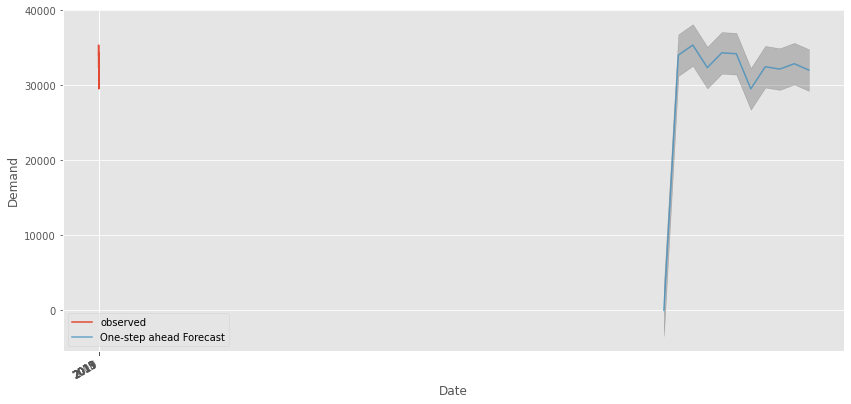

In [233]:
pred = results.get_prediction(start=pd.to_datetime('2009'), dynamic=False)
pred_ci = pred.conf_int()
ax = df11['consumption'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

In [249]:
df1.index = pd.to_datetime(df1.index)
df11=df1.iloc[:,6:7]
df11

,consumption
time,
2009-01-01,34040.6360
2010-01-01,35392.9110
2011-01-01,32378.0630
2012-01-01,34348.3360
2013-01-01,34230.6200
2014-01-01,29545.9800
2015-01-01,32494.4830
2016-01-01,32185.1010
2017-01-01,32898.6390


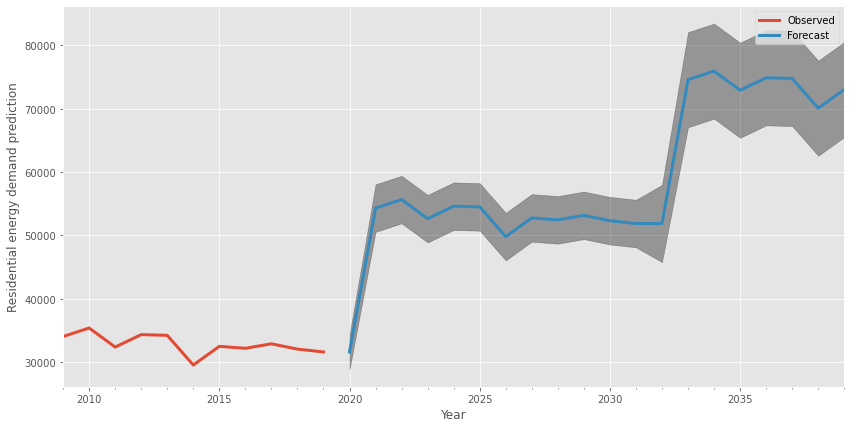

In [270]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = df11['consumption'].plot(label='Observed', figsize=(14, 7),linewidth=3)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast',linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.35)
ax.set_xlabel('Year')
ax.set_ylabel('Residential energy demand prediction')

plt.legend()
plt.savefig('5_predict.png')
plt.show()